In [1]:
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')


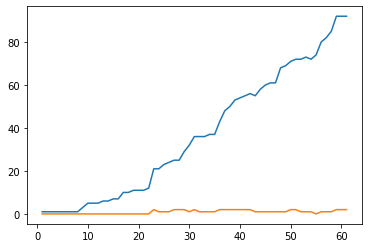

In [3]:
df = df[df['city']=='Ivinhema']
plt.plot(df.day,df.cases)
plt.plot(df.day,df.avg7_cases)
# plt.plot(df.day,df.deaths)

In [4]:
df.tail()

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
162161,2020-07-22,MS,Ivinhema,city,82,1,57,False,23187,5004700,...,0.0,3.536,0.043,0.086,0.0,1,0,1.34,0.068,0.0
162162,2020-07-23,MS,Ivinhema,city,85,1,58,False,23187,5004700,...,0.0,3.666,0.043,0.129,0.0,1,0,1.31,0.080,0.0
162163,2020-07-24,MS,Ivinhema,city,92,1,59,False,23187,5004700,...,0.0,3.968,0.043,0.302,0.0,2,0,1.26,0.123,0.0
162164,2020-07-25,MS,Ivinhema,city,92,1,60,False,23187,5004700,...,0.0,3.968,0.043,0.000,0.0,2,0,1.22,0.117,0.0
162165,2020-07-26,MS,Ivinhema,city,92,1,61,True,23187,5004700,...,0.0,3.968,0.043,0.000,0.0,2,0,1.18,0.123,0.0


In [5]:
df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df['date'] = df['date'].astype('datetime64[ns]')


In [6]:
df = df[df['country']=='Brazil']
df.tail()

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recovery_day_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million,perc_death,perc_recovery,active_cases
3248,Brazil,2020-07-23,2287475,84082,1620313,149,59961.0,1311,28338,-11.64,...,134.3,39332.0,1056.0,31826.0,186.357,5.014,150.814,3.68,70.83,583080
3249,Brazil,2020-07-24,2343366,85238,1693214,150,55891.0,1156,72901,-6.79,...,345.4,42434.0,1055.0,37813.0,201.057,5.014,179.186,3.64,72.26,564914
3250,Brazil,2020-07-25,2394513,86449,1785359,151,51147.0,1211,92145,-8.49,...,436.6,45664.0,1096.0,48278.0,216.357,5.200,228.771,3.61,74.56,522705
3251,Brazil,2020-07-26,2419091,87004,1812913,152,24578.0,555,27554,-51.95,...,130.6,45814.0,1073.0,50548.0,217.071,5.086,239.529,3.60,74.94,519174
3252,Brazil,2020-07-27,2442375,87618,1846641,153,23284.0,614,33728,-5.26,...,159.8,46247.0,1071.0,47477.0,219.114,5.071,224.971,3.59,75.61,508116


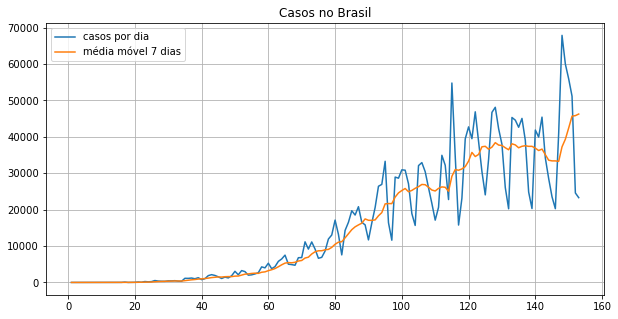

In [7]:
plt.figure(figsize=(10,5))
plt.title('Casos no Brasil')
plt.plot(df.day,df.case_day, label='casos por dia')
plt.plot(df.day,df.avg7_cases, label='média móvel 7 dias')
plt.grid()

plt.legend()

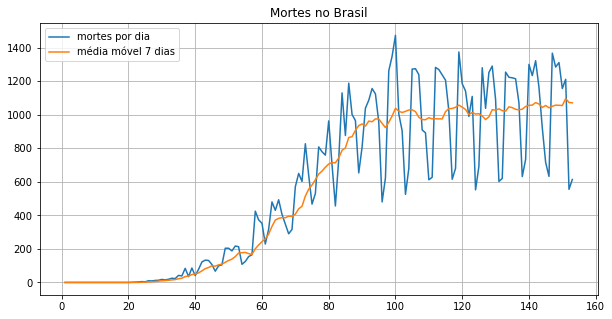

In [8]:
plt.figure(figsize=(10,5))
plt.title('Mortes no Brasil')
plt.plot(df.day,df.death_day, label='mortes por dia')
plt.plot(df.day,df.avg7_deaths, label='média móvel 7 dias')
plt.grid()
plt.legend()

In [9]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')

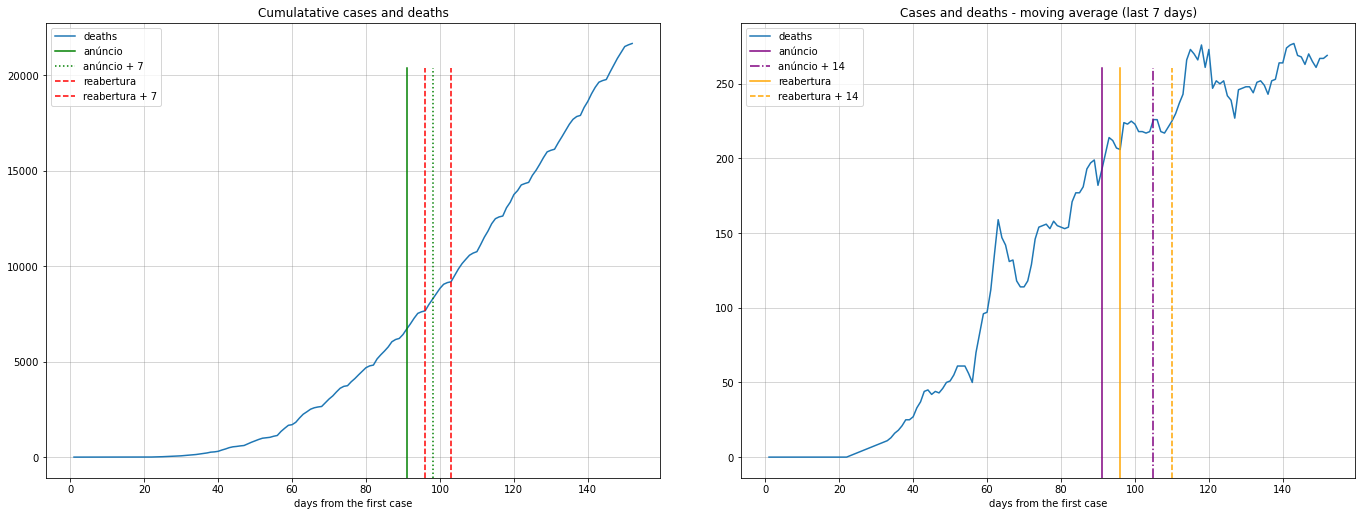

In [11]:

# Selected cities
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases and deaths")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cases and deaths - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

dados = df[(df['state'] == 'SP') & (df['place_type']=='state')]

ax1.plot(dados.day, dados.cases, label = 'cases')
ax1.plot(dados.day, dados.deaths, label = 'deaths')
ax2.plot(dados.day, dados.avg7_cases, label = 'cases')
ax2.plot(dados.day, dados.avg7_deaths, label = 'deaths')

ax1.axvline(x=91, ymin=0, ymax=0.9, color = 'green', linestyle = '-',label = 'anúncio')
ax1.axvline(x=91+7, ymin=0, ymax=0.9, color = 'green', linestyle = ':',label = 'anúncio + 7')
ax1.axvline(x=96, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura')
ax1.axvline(x=96+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura + 7')

ax2.axvline(x=91, ymin=0, ymax=0.9, color = 'purple', linestyle = '-',label = 'anúncio')
ax2.axvline(x=91+14, ymin=0, ymax=0.9, color = 'purple', linestyle = '-.',label = 'anúncio + 14')
ax2.axvline(x=96, ymin=0, ymax=0.9, color = 'orange', linestyle = '-',label = 'reabertura')
ax2.axvline(x=96+14, ymin=0, ymax=0.9, color = 'orange', linestyle = '--',label = 'reabertura + 14')

ax1.legend()
ax2.legend()
# fig.savefig('../analysis/saoPaulo_cases_deaths.png')